In [ ]:
import pandas as pd
import numpy as np
import langdetect 
import re
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktParameters
tokenizer = PunktSentenceTokenizer()
def data_clean(typee, label):
    def string_clean(s):
        string = re.sub(r'<.*?>','', s) # remove html tag
        string = re.sub(r'http[s]?://\S+', '', string) # remove url
        string = re.sub(r'\\n', ' ', string) # remove new line
        string = re.sub(r'[^a-zA-Z0-9\s]', ' ', string) # remove sepcial characters
        string = re.sub(r'([a-z])([A-Z])', r'\1 \2', string) # separate sticky words
        string = re.sub(r"(?<!\S)[^aA](?!\S)", " ", string)
        words = re.split(r'\s+', string.strip())
        new_string = ' '.join(words)
        return new_string

    file = open(f'./log/data_clean_log/{typee}_repos_with_no_read_me.txt', 'a')
    file2 = open(f'./log/data_clean_log/{typee}_repos_not_english.txt','a')
    df = pd.read_csv(f'{typee}_repos.csv')
    new_df = []
    for row in df.iterrows():
        idx = row[0]
        name = df.iloc[idx]['name']
        stars = df.iloc[idx]['stars']
        url = df.iloc[idx]['url']
        defaultBranch = df.iloc[idx]['defaultBranche']
        des = str(df.iloc[idx]['description'])
        readme = str(df.iloc[idx]['readme'])

        # check if t
        if readme == '[]' or readme=='['']':
            file.write(f'{name},{des},{stars},{url},{defaultBranch},{readme}\n')
            continue

        # check if the repos is English
        try:
            if langdetect.detect(readme) != 'en':
                file2.write(f'{name},{des},{stars},{url},{defaultBranch},{readme}\n')
                continue
        except:
            print(readme)
            continue
        # clean special character for README.md and description
        readme = string_clean(readme)
        des = string_clean(des)

        new_df.append((name, des, stars, url, defaultBranch, readme))

    new_df = pd.DataFrame(data=new_df, columns=['name','description','stars','url',
                                                'defaultBranche','readme'])

    new_df['label'] = label
    new_df.to_csv(f'clean_{typee}_repos.csv', index=False)
    file.close()
    file2.close()

TYPE = ['database','framework','library', 'pl','platform','plugin','toolkit']
for label, t in enumerate(TYPE):
    data_clean(t, label)

['']
['']
['']


In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
stopwordsSet = set(stopwords.words("english"))
stopwordsSet.add('use')
stopwordsSet.add('using')
stopwordsSet.add('used')
stopwordsSet.add('user')
stopwordsSet.add('code')
stopwordsSet.add('file')
stopwordsSet.add('example')
stopwordsSet.add('support')

def wordcloud_draw(data, dataName, color = 'black'):
    words = ' '.join(data)
    cleanedWord = ' '.join([word for word in words.split() if word.lower()  not in stopwordsSet 
                            and len(word) > 1])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                    background_color=color,
                    width=2500,
                    height=2000
                    ).generate(cleanedWord)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.savefig(f'./res/{dataName}_wordcloud.png')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Minh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


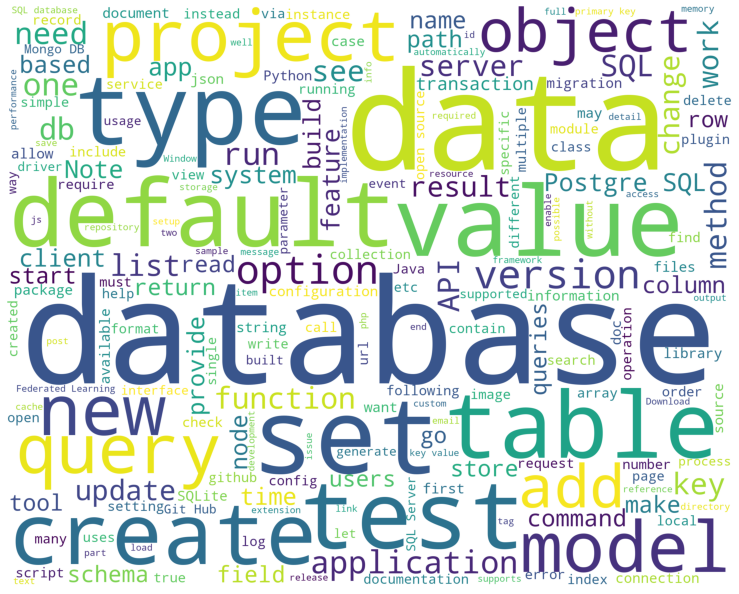

In [21]:
import pandas as pd
df1 = pd.read_csv('clean_database_repos.csv')
df2 = pd.read_csv('clean_framework_repos.csv')
df3 = pd.read_csv('clean_platform_repos.csv')
df4 = pd.read_csv('clean_plugin_repos.csv')
df5 = pd.read_csv('clean_pl_repos.csv')
df6 = pd.read_csv('clean_library_repos.csv')
df7 = pd.read_csv('clean_toolkit_repos.csv')

df1['readme'] = df1['readme'].astype(str)
df2['readme'] = df2['readme'].astype(str)
df3['readme'] = df3['readme'].astype(str)
df4['readme'] = df4['readme'].astype(str)
df5['readme'] = df5['readme'].astype(str)
df6['readme'] = df6['readme'].astype(str)
df7['readme'] = df7['readme'].astype(str)
wordcloud_draw(df1['readme'], 'database', 'white')

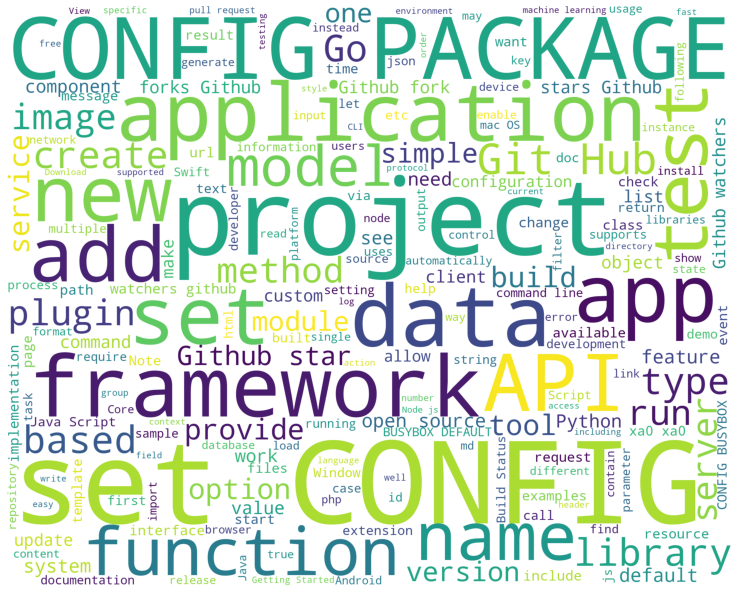

In [22]:
wordcloud_draw(df2['readme'], 'framework', 'white')

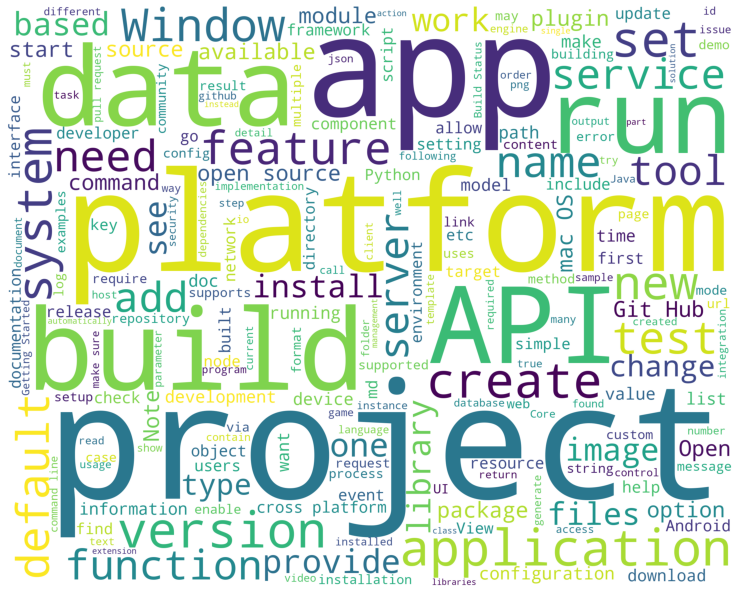

In [23]:
wordcloud_draw(df3['readme'], 'platform', 'white')

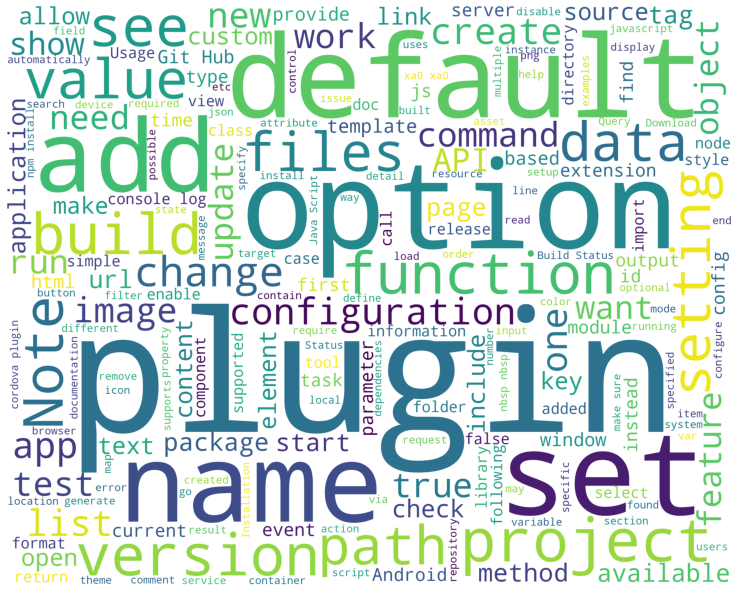

In [24]:
wordcloud_draw(df4['readme'], 'plugin', 'white')

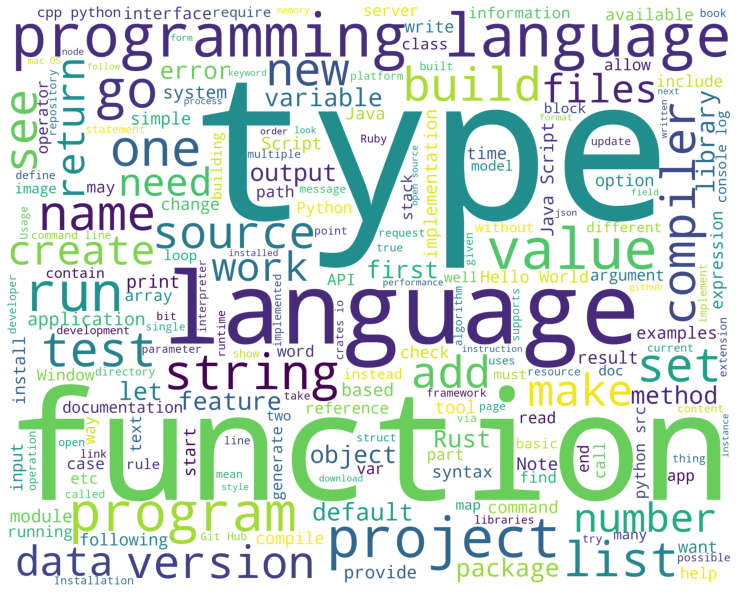

In [25]:
wordcloud_draw(df5['readme'], 'pl', 'white')

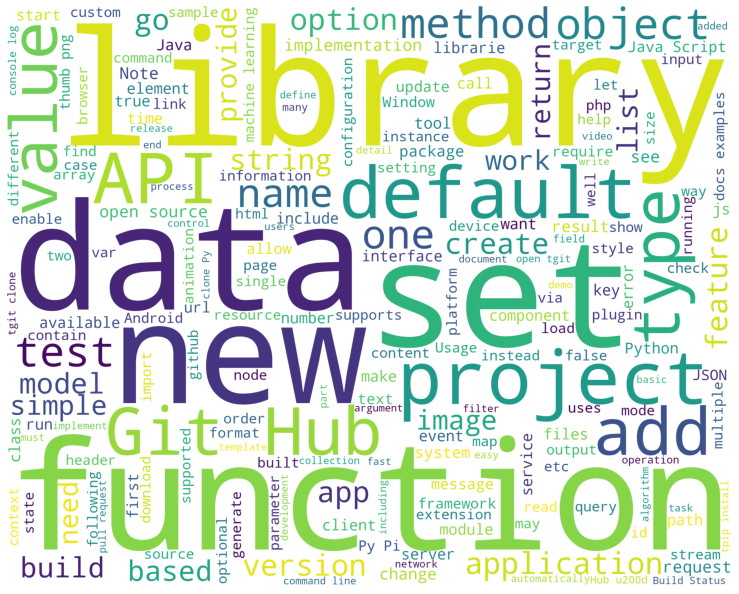

In [26]:
wordcloud_draw(df6['readme'], 'library', 'white')

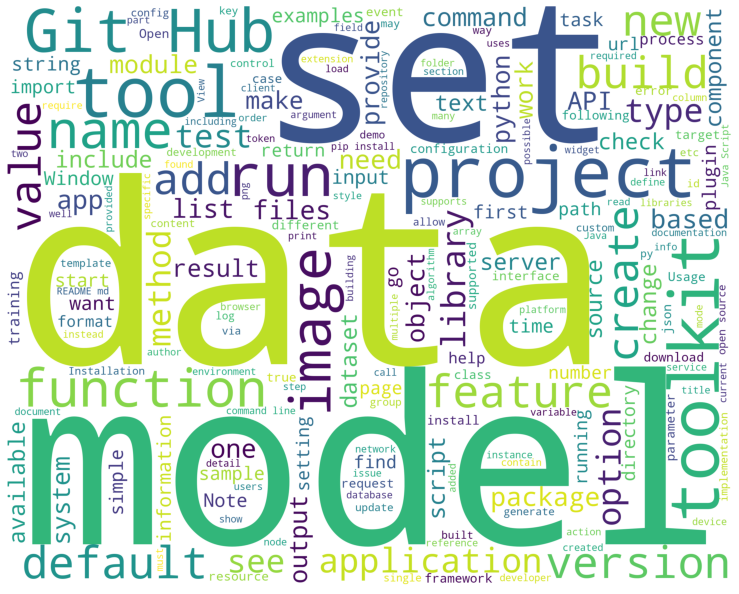

In [27]:
wordcloud_draw(df7['readme'], 'toolkit', 'white')